In [32]:
%matplotlib inline

In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

## Loading data

In [128]:
nodes_vv = pd.read_csv('../data/processed/bang_ved_vejen_nodes.csv')
edges_vv = pd.read_csv('../data/processed/bang_ved_vejen_edges.csv')
nodes_nl = pd.read_csv('../data/processed/1880_Jacobsen_NielsLyhne_nodes.csv')
edges_nl = pd.read_csv('../data/processed/1898_Pontoppidan_LykkePer_edges.csv')
nodes_lp = pd.read_csv('../data/processed/1898_Pontoppidan_LykkePer_nodes.csv')
edges_lp = pd.read_csv('../data/processed/1880_Jacobsen_NielsLyhne_edges.csv')

test_nodes = pd.read_csv('../data/processed/test_nodes.csv')

In [131]:
nodes_vv.head(100)

,Id,Polarity,Polarity_normalized,Polarity_sentence,Polarity_sentence_normalized,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
0,Abel,15.8182,0.082396,-0.5703,0.063550,21,0.263158,49,0.072398,21,0.263158,0.199517,0.526972,0.070317,0.149119
1,Louise,0.6240,0.027154,-1.1138,0.042956,11,0.131579,25,0.036199,11,0.131579,0.119630,0.315847,0.017197,0.036468
2,Frøken Jensen,31.4740,0.139316,5.5189,0.294271,24,0.302632,72,0.107089,24,0.302632,0.200388,0.529276,0.071051,0.150674
3,Ida-Yngst,15.0147,0.079474,1.5911,0.145446,16,0.197368,35,0.051282,16,0.197368,0.170440,0.450129,0.037626,0.079792
4,Louise-Ældst,29.4929,0.132113,2.6492,0.185537,18,0.223684,66,0.098039,18,0.223684,0.205971,0.544029,0.012590,0.026700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Lille Linde,0.0000,0.024885,0.0000,0.085158,1,0.000000,1,0.000000,1,0.000000,0.025357,0.066699,0.000000,0.000000
96,sjokker,0.6499,0.027248,0.0000,0.085158,1,0.000000,1,0.000000,1,0.000000,0.025357,0.066699,0.000000,0.000000
97,Rikard,0.9901,0.028485,0.7035,0.111814,2,0.013158,2,0.001508,2,0.013158,0.030075,0.079170,0.000000,0.000000
98,Frøken Horten,0.9901,0.028485,-0.6523,0.060443,2,0.013158,2,0.001508,2,0.013158,0.030075,0.079170,0.000000,0.000000


In [130]:
edges_vv.head()

,Source,Target,Type,Weight
0,Abel,Louise,Undirected,2
1,Frøken Jensen,Louise,Undirected,1
2,Frøken Jensen,Ida-Yngst,Undirected,4
3,Abel,Ida-Yngst,Undirected,3
4,Ida-Yngst,Louise,Undirected,3


In [108]:
test_nodes.head()

,Id,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
0,Abel,2,0.2,3,0.142857,2,0.2,0.229985,0.309038,0.000000,0.000000
1,Louise,4,0.6,7,0.714286,4,0.6,0.366110,0.697393,0.121212,0.372093
2,Frøken Jensen,5,0.8,6,0.571429,5,0.8,0.444702,0.921610,0.204545,0.627907
3,Ida-Yngst,6,1.0,9,1.000000,6,1.0,0.472179,1.000000,0.325758,1.000000
4,Louise-Ældst,4,0.6,4,0.285714,4,0.6,0.350995,0.654271,0.164141,0.503876


### Visualizing Connections and Interactions

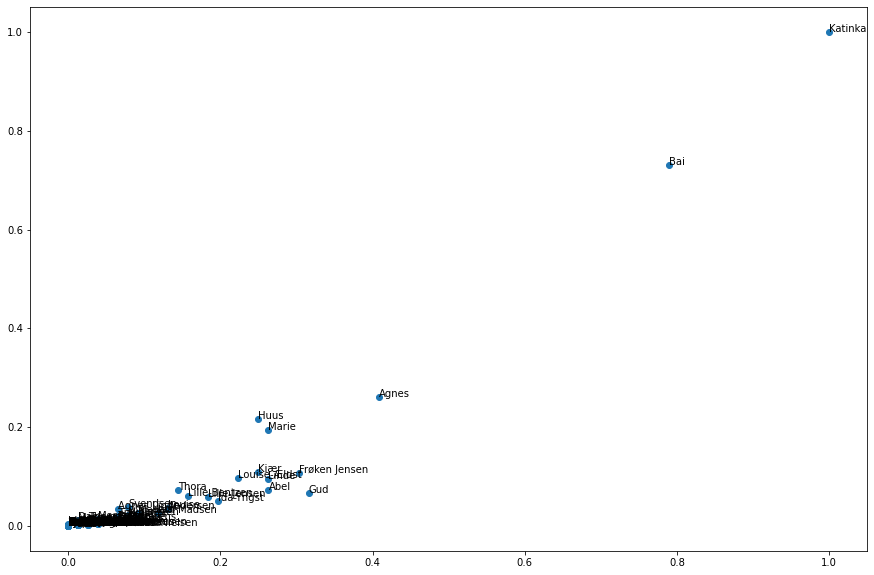

In [37]:
fig, ax = plt.subplots()
for idx, row in nodes.iterrows():
    ax.annotate(row['Id'], (row['Connections_normalized'], row['Interactions_normalized']))
ax.scatter(x=nodes['Connections_normalized'], y=nodes['Interactions_normalized'])

## Netværk

In [48]:
edges.rename(columns={'Source': 'source', 'Target':'target'}, inplace=True)

In [68]:
G = nx.from_pandas_edgelist(edges)

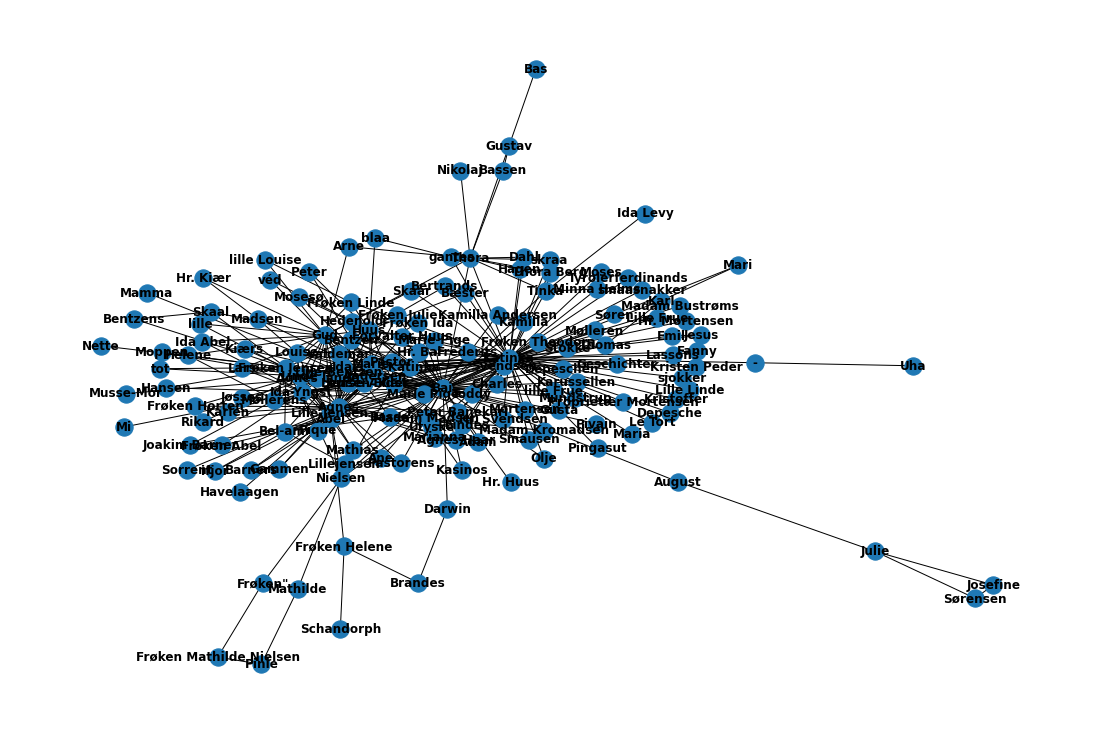

In [80]:
nx.draw(G, with_labels=True, font_weight='bold')

In [52]:
degrees = G.degree()

In [55]:
degrees = dict(degrees)

In [72]:
nx.barycenter(G)

['Katinka']

In [78]:
x = nx.centrality.betweenness.betweenness_centrality(G)

In [79]:
dict(sorted(x.items(), key=lambda item: item[1]))

{'Kiærs': 0.0,
 'Ida Abel': 0.0,
 'Mi': 0.0,
 'Hr. Huus': 0.0,
 'Nette': 0.0,
 'tot': 0.0,
 'Moppen': 0.0,
 'Lassons': 0.0,
 'Fanny': 0.0,
 'Ida Levy': 0.0,
 'Minna Helms': 0.0,
 'Thora Berg': 0.0,
 'Ane': 0.0,
 'Marie Pige': 0.0,
 'Frøken Abel': 0.0,
 'Forvalter Huus': 0.0,
 'Kamilla': 0.0,
 'Kamilla Andersen': 0.0,
 'Mathias': 0.0,
 'Bentzens': 0.0,
 'Hedenold': 0.0,
 'Mundstrup': 0.0,
 'Marie-Pige': 0.0,
 'véd': 0.0,
 'Pingasut': 0.0,
 'Hansen': 0.0,
 'Schandorph': 0.0,
 'Kristen Peder': 0.0,
 'Frøken Ida': 0.0,
 'Utyske': 0.0,
 'Uha': 0.0,
 'Mosesø': 0.0,
 'Valdemar': 0.0,
 'Charles': 0.0,
 'Bertrands': 0.0,
 'Tyrolerferdinands': 0.0,
 'Le Tort': 0.0,
 'Karussellen': 0.0,
 'Frøken Theodora': 0.0,
 'Bæster': 0.0,
 'Stokke': 0.0,
 'Sørensen': 0.0,
 'Josefine': 0.0,
 'Frøken Julie': 0.0,
 'smaasnakker': 0.0,
 'Lille Linde': 0.0,
 'sjokker': 0.0,
 'Rikard': 0.0,
 'Frøken Horten': 0.0,
 'Marianna': 0.0,
 'Havelaagen': 0.0,
 'Kristoffer': 0.0,
 'Moses': 0.0,
 'Skaar': 0.0,
 'Arne': 0.0,


In [59]:
edgelist = [('a', 'b'), ('a', 'c')]

In [60]:
G = nx.from_edgelist(edgelist)

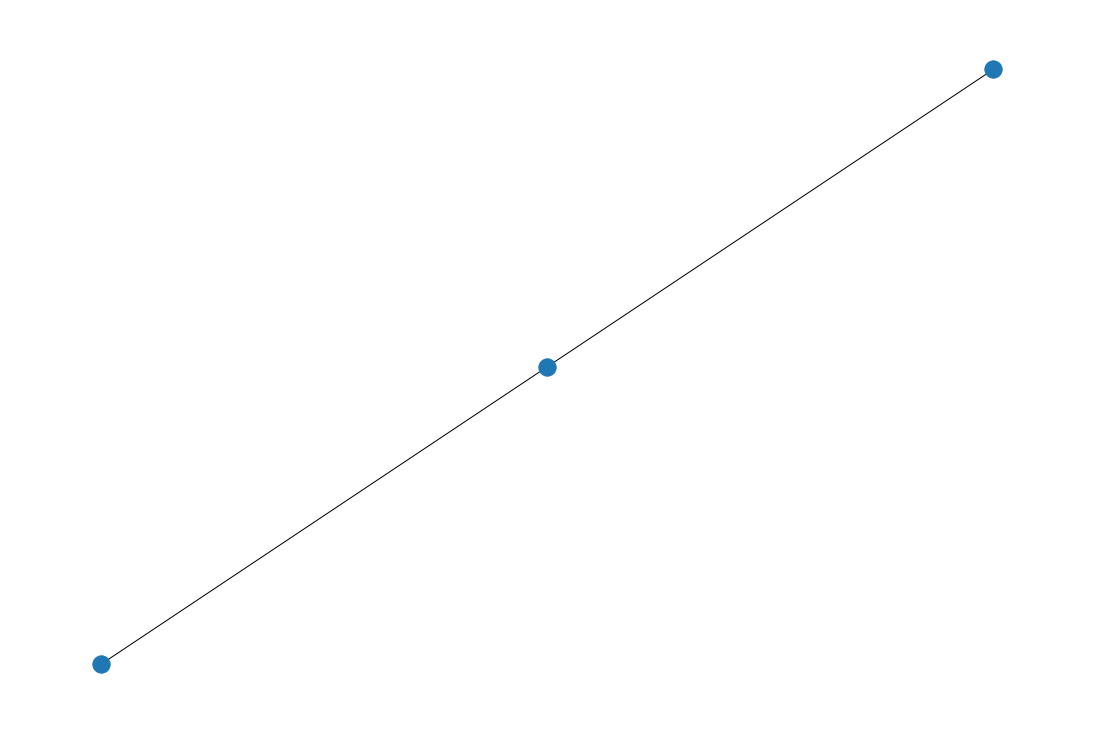

In [61]:
nx.draw(G)

In [100]:
from networkx.algorithms.threshold import find_threshold_graph

In [101]:
T = find_threshold_graph(G)

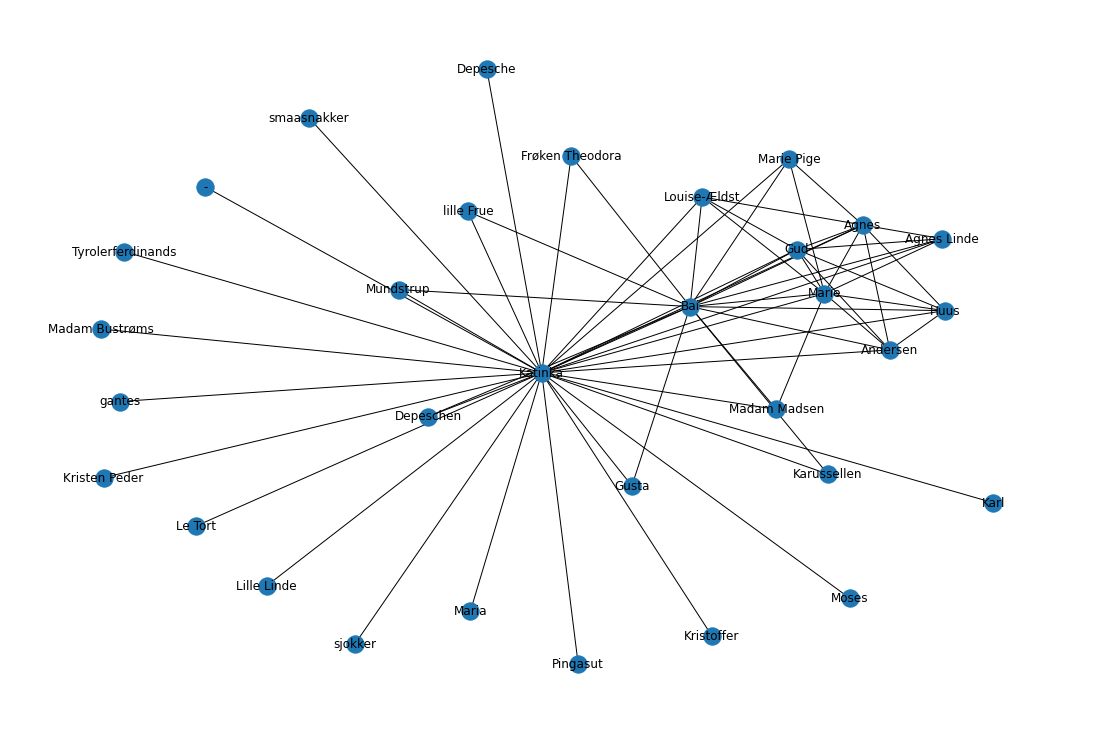

In [104]:
nx.draw(T, with_labels=True)

## Determining the main characters

In [120]:
nodes.sort_values(by=['Betweenness'], ascending=False).head()

,Id,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
21,Katinka,77,1.000000,664,1.000000,77,1.000000,0.378503,1.000000,0.471554,1.000000
8,Bai,61,0.789474,486,0.731523,61,0.789474,0.363175,0.959492,0.347739,0.737432
62,Agnes,32,0.407895,174,0.260935,32,0.407895,0.234487,0.619393,0.088772,0.188254
9,Gud,25,0.315789,46,0.067873,25,0.315789,0.217285,0.573931,0.076783,0.162829
2,Frøken Jensen,24,0.302632,72,0.107089,24,0.302632,0.200388,0.529276,0.071051,0.150674


In [119]:
nodes_nl.sort_values(by=['Betweenness'], ascending=False).head()

,Id,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
4,Niels,66,1.000000,261,1.000000,66,1.000000,0.552318,1.000000,0.612995,1.000000
47,Erik,36,0.538462,159,0.607692,36,0.538462,0.328204,0.594230,0.267553,0.436469
1,Gud,22,0.323077,54,0.203846,22,0.323077,0.252006,0.456269,0.177310,0.289253
22,Edele,14,0.200000,32,0.119231,14,0.200000,0.136148,0.246503,0.100067,0.163243
2,Lyhne,13,0.184615,28,0.103846,13,0.184615,0.155336,0.281243,0.068207,0.111268


In [122]:
nodes.sort_values(by=['Centrality'], ascending=False).head()

,Id,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
21,Katinka,77,1.000000,664,1.000000,77,1.000000,0.378503,1.000000,0.471554,1.000000
8,Bai,61,0.789474,486,0.731523,61,0.789474,0.363175,0.959492,0.347739,0.737432
62,Agnes,32,0.407895,174,0.260935,32,0.407895,0.234487,0.619393,0.088772,0.188254
9,Gud,25,0.315789,46,0.067873,25,0.315789,0.217285,0.573931,0.076783,0.162829
17,Linde,21,0.263158,64,0.095023,21,0.263158,0.214460,0.566466,0.034313,0.072766


In [140]:
nodes_nl.sort_values(by=['Centrality'], ascending=False).head()

,Id,Polarity,Polarity_normalized,Polarity_sentence,Polarity_sentence_normalized,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
4,Niels,99.9822,1.000000,12.1270,1.000000,66,1.000000,261,1.000000,66,1.000000,0.552318,1.000000,0.612995,1.000000
47,Erik,74.4661,0.764619,9.5142,0.825314,36,0.538462,159,0.607692,36,0.538462,0.328204,0.594230,0.267553,0.436469
1,Gud,22.6866,0.286963,3.4397,0.419186,22,0.323077,54,0.203846,22,0.323077,0.252006,0.456269,0.177310,0.289253
37,Niels Lyhne,15.9447,0.224770,3.7041,0.436863,16,0.230769,44,0.165385,16,0.230769,0.203632,0.368686,0.058803,0.095927
126,Fennimore,35.7131,0.407130,4.2978,0.476556,10,0.138462,83,0.315385,10,0.138462,0.180860,0.327457,0.016089,0.026246


In [117]:
nodes.sort_values(by=['Degree'], ascending=False).head()

,Id,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
21,Katinka,77,1.000000,664,1.000000,77,1.000000,0.378503,1.000000,0.471554,1.000000
8,Bai,61,0.789474,486,0.731523,61,0.789474,0.363175,0.959492,0.347739,0.737432
62,Agnes,32,0.407895,174,0.260935,32,0.407895,0.234487,0.619393,0.088772,0.188254
9,Gud,25,0.315789,46,0.067873,25,0.315789,0.217285,0.573931,0.076783,0.162829
2,Frøken Jensen,24,0.302632,72,0.107089,24,0.302632,0.200388,0.529276,0.071051,0.150674


In [141]:
nodes_nl.sort_values(by=['Degree'], ascending=False).head()

,Id,Polarity,Polarity_normalized,Polarity_sentence,Polarity_sentence_normalized,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
4,Niels,99.9822,1.000000,12.1270,1.000000,66,1.000000,261,1.000000,66,1.000000,0.552318,1.000000,0.612995,1.000000
47,Erik,74.4661,0.764619,9.5142,0.825314,36,0.538462,159,0.607692,36,0.538462,0.328204,0.594230,0.267553,0.436469
1,Gud,22.6866,0.286963,3.4397,0.419186,22,0.323077,54,0.203846,22,0.323077,0.252006,0.456269,0.177310,0.289253
37,Niels Lyhne,15.9447,0.224770,3.7041,0.436863,16,0.230769,44,0.165385,16,0.230769,0.203632,0.368686,0.058803,0.095927
22,Edele,15.3914,0.219666,4.3285,0.478609,14,0.200000,32,0.119231,14,0.200000,0.136148,0.246503,0.100067,0.163243


In [144]:
nodes_vv.sort_values(by=['Polarity'], ascending=False).head(100)

,Id,Polarity,Polarity_normalized,Polarity_sentence,Polarity_sentence_normalized,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
21,Katinka,268.2050,1.000000,24.1445,1.000000,77,1.000000,664,1.000000,77,1.000000,0.378503,1.000000,0.471554,1.000000
8,Bai,163.5126,0.619369,18.1642,0.773405,61,0.789474,486,0.731523,61,0.789474,0.363175,0.959492,0.347739,0.737432
32,Huus,53.6228,0.219842,5.7666,0.303656,20,0.250000,145,0.217195,20,0.250000,0.180809,0.477532,0.040455,0.085790
62,Agnes,48.2206,0.200201,4.4933,0.255411,32,0.407895,174,0.260935,32,0.407895,0.234487,0.619393,0.088772,0.188254
29,Marie,36.2048,0.156515,4.5043,0.255828,21,0.263158,130,0.194570,21,0.263158,0.203963,0.538725,0.022823,0.048401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,lille Louise,0.9405,0.028305,0.0857,0.088406,2,0.013158,2,0.001508,2,0.013158,0.018046,0.047379,0.000115,0.000243
15,Nette,0.9325,0.028276,0.0000,0.085158,1,0.000000,2,0.001508,1,0.000000,0.013424,0.035164,0.000000,0.000000
13,Hr. Huus,0.9325,0.028276,-0.0857,0.081911,1,0.000000,1,0.000000,1,0.000000,0.024330,0.063985,0.000000,0.000000
72,Charles,0.9153,0.028213,-0.4834,0.066842,4,0.039474,4,0.004525,4,0.039474,0.067445,0.177931,0.000000,0.000000


In [139]:
nodes_vv.sort_values(by=['Polarity_sentence_normalized'], ascending=True).head(100)

,Id,Polarity,Polarity_normalized,Polarity_sentence,Polarity_sentence_normalized,Connections,Connections_normalized,Interactions,Interactions_normalized,Degree,Degree_normalized,Centrality,Centrality_normalized,Betweenness,Betweenness_normalized
42,Lille-Bentzen,7.8447,0.053406,-2.2475,0.000000,13,0.157895,41,0.060332,13,0.157895,0.140395,0.370725,0.013931,0.029542
6,Kiær,10.8243,0.064239,-2.2215,0.000985,20,0.250000,73,0.108597,20,0.250000,0.180953,0.477913,0.032299,0.068494
7,Madsen,0.2554,0.025814,-1.3056,0.035689,3,0.026316,4,0.004525,3,0.026316,0.021207,0.055731,0.000674,0.001429
67,-,0.9722,0.028420,-1.1630,0.041092,2,0.013158,2,0.001508,2,0.013158,0.025471,0.067001,0.012903,0.027363
1,Louise,0.6240,0.027154,-1.1138,0.042956,11,0.131579,25,0.036199,11,0.131579,0.119630,0.315847,0.017197,0.036468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Maria,0.9453,0.028322,0.0857,0.088406,1,0.000000,1,0.000000,1,0.000000,0.025357,0.066699,0.000000,0.000000
104,Arne,0.9484,0.028333,0.0857,0.088406,2,0.013158,2,0.001508,2,0.013158,0.019859,0.052170,0.000000,0.000000
69,lille Louise,0.9405,0.028305,0.0857,0.088406,2,0.013158,2,0.001508,2,0.013158,0.018046,0.047379,0.000115,0.000243
19,Moppen,1.5197,0.030411,0.1280,0.090008,2,0.013158,4,0.004525,2,0.013158,0.027791,0.073132,0.000000,0.000000


In [151]:
def graph(nodes, x_label, y_label):
    fig, ax = plt.subplots()
    for idx, row in nodes.iterrows():
        ax.annotate(row['Id'], (row['Connections_normalized'], row['Betweenness_normalized']))
    ax.scatter(x=nodes[x_label], y=nodes[y_label])

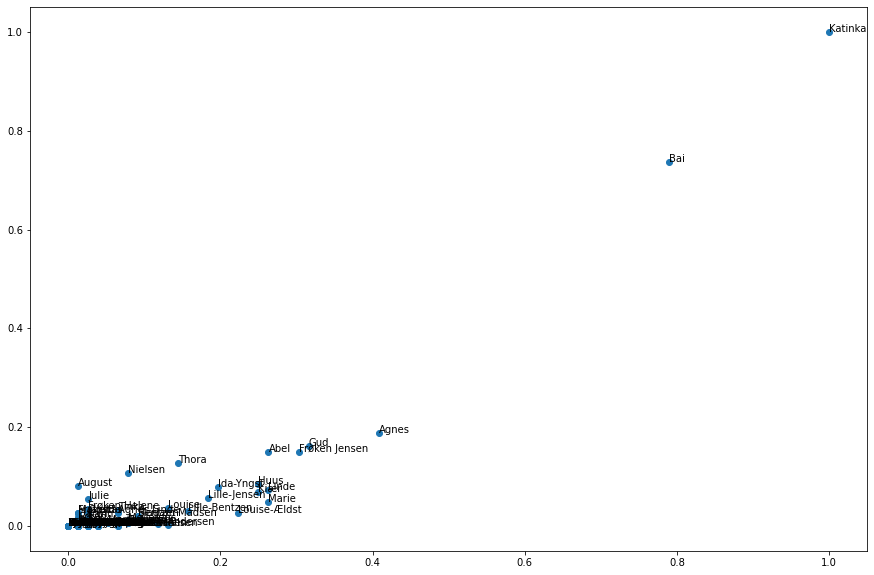

In [152]:
graph(nodes_vv, 'Connections_normalized', 'Betweenness_normalized')

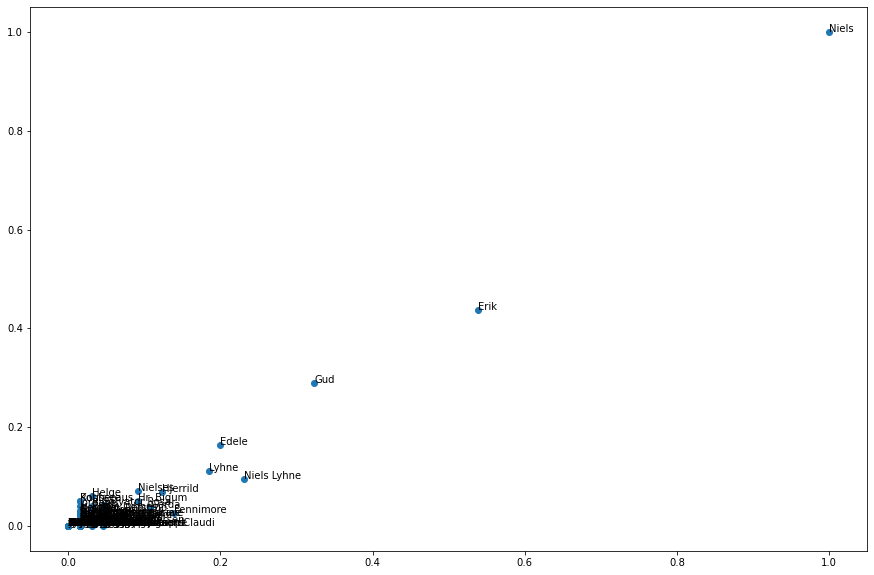

In [153]:
graph(nodes_nl, 'Connections_normalized', 'Betweenness_normalized')

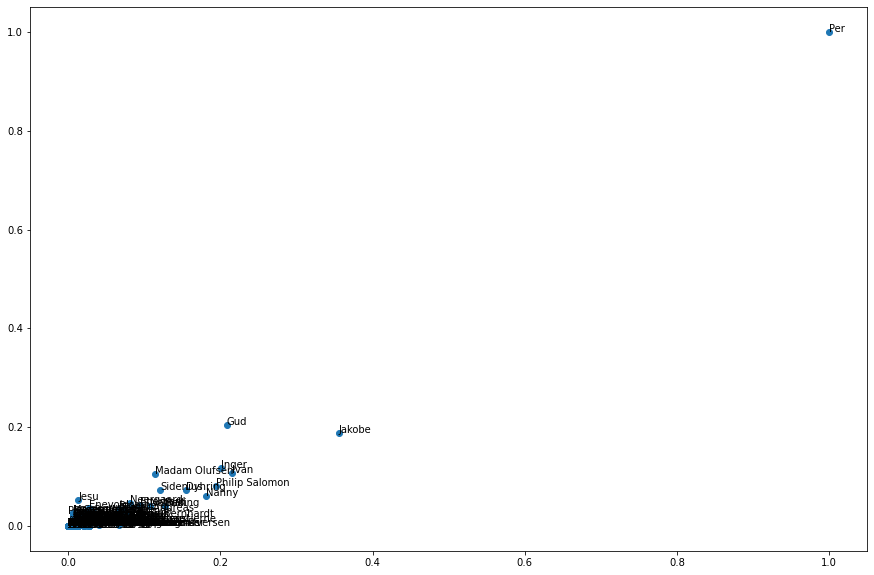

In [154]:
graph(nodes_lp, 'Connections_normalized', 'Betweenness_normalized')